# Challenge 2
Tiernan Kennedy

## Importing Data

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
spectra = pd.read_csv('Mutant_spectral_data.csv')
spectra

Mutant                                            Sequence  \
0          >HW2_Mutant_1  MRIHILGRIELTQERLGRDLEYPATVATVEEEPDEFSNGFPKPIPT...   
1          >HW2_Mutant_2  MRSHDLGHIELLQERSGRDLEYLATVPVVEEEKDEWSNGFWKNRPL...   
2          >HW2_Mutant_3  MRSHILWRMALDQERLGERPEWLGTVKTVEEEKDEFSWGFWIIIPL...   
3          >HW2_Mutant_4  MRSHIGGRIELDQTRLHRDREYLHTEPDVEEERDEFSMGFMKIHPL...   
4          >HW2_Mutant_5  MRSHILHRIELDQKRLGRDLNGLATVPKVEEPCDQFSNGFHKIIPL...   
...                  ...                                                ...   
19995  >HW2_Mutant_19996  MRSHILGRIEYDGQRLCRDLTRLATVPTVEEEQDERKNVQHKNHPI...   
19996  >HW2_Mutant_19997  MRNHVLGRIEFDRERLCRDSEGLTMVPTVIEEEDEFSNGFDKNEPT...   
19997  >HW2_Mutant_19998  MRSHICGRIEADQPGLGRDLEGLATVPTIELEQDPFSNGFGKIINL...   
19998  >HW2_Mutant_19999  MMSHILGSKTADQSRLMRQREYLAMAPAVEELEVELSNGFWKIIPL...   
19999  >HW2_Mutant_20000  MRSHNLGRIELDQSRLERDHEYLATVPTYEEEYDEKSPWFWKMFPL...   

              220         221         222         223         224         225  \
0      879.377409  822.091339  792.591873  739.054097  710.099970  660.454668   
1      891.836120  828.641152  775.404442  752.229211  708.822237  666.857806   
2      891.061735  824.477682  761.201729  741.534191  714.954598  676.138235   
3      817.136180  767.647393  737.052244  694.367603  659.398109  623.552189   
4      879.479029  827.828662  785.733449  742.916280  704.475367  664.770296   
...           ...         ...         ...         ...         ...         ...   
19995  879.095612  831.799655  784.398246  750.543350  708.786249  671.562822   
19996  879.498328  830.613809  792.314925  739.136395  707.040411  661.728225   
19997  880.165758  811.278561  791.052431  745.555648  702.966419  674.967847   
19998  885.548164  824.402927  796.939633  746.551611  700.478560  674.307352   
19999  874.155167  823.356220  791.341447  733.755770  711.083213  672.887833   

              226         227  ...        391        392        393  \
0      642.271022  615.038458  ...  68.375984  66.400686  54.511363   
1      642.626545  607.751811  ...  67.463975  64.763600  62.787035   
2      639.701147  604.585058  ...  61.318344  66.500926  58.992598   
3      595.353672  571.931188  ...  85.506157  79.176640  93.765015   
4      635.551999  610.155320  ...  63.324675  67.400273  62.908422   
...           ...         ...  ...        ...        ...        ...   
19995  648.820505  611.254469  ...  52.842383  50.768511  62.037891   
19996  645.237110  611.214593  ...  65.137927  72.732291  62.255331   
19997  635.946090  616.069438  ...  58.520801  54.465502  48.571688   
19998  638.058308  608.840420  ...  62.559561  60.553920  71.977064   
19999  644.268063  621.657827  ...  51.655541  55.007674  63.594869   

             394        395        396        397        398        399  \
0      61.838138  55.126632  41.557465  63.399463  44.207466  37.089249   
1      58.638255  59.371134  48.059149  53.587275  48.529747  47.046336   
2      57.373569  55.474235  54.187196  50.700688  50.280181  49.646669   
3      75.255755  86.112318  68.218985  71.923604  82.397209  74.201347   
4      55.117036  57.376562  46.826791  47.184000  60.025978  38.859807   
...          ...        ...        ...        ...        ...        ...   
19995  67.832146  58.083404  68.122741  54.081978  50.457089  49.075574   
19996  52.290184  64.102461  57.330011  48.034495  63.188589  40.315949   
19997  62.746388  54.027078  50.531954  47.049161  48.122404  46.835470   
19998  63.434845  57.673777  57.485644  49.864888  51.813198  51.668753   
19999  59.468037  54.152701  57.497297  60.864536  49.700552  39.164178   

             400  
0      43.087305  
1      46.890761  
2      44.603128  
3      64.947308  
4      50.440454  
...          ...  
19995  54.700392  
19996  42.463133  
19997  48.036030  
19998  42.864333  
19999  51.858607  

[20000 rows x 183 columns]

## Analysing distributions of absorbances across spectra to determine product categories and estimated variance

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors

def getAbsDistribution(df, NM):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot of sorted values
    values = list(df[str(NM)].values)
    # values.sort()
    scatter = ax[0].scatter(range(len(values)), values, marker='x', linewidth=0.1)
    ax[0].set_ylim(370, 1000)
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel('Absorbance')
    ax[0].set_title(f'Absorbance Distribution at {NM} nm')
    
    # Histogram of values
    ax[1].hist(values, bins=100, edgecolor='black')
    ax[1].set_ylim(0, 10000)
    ax[1].set_xlabel('Absorbance')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title(f'Absorbance Histogram at {NM} nm')
    
    plt.tight_layout()
    plt.show()

# Example dataframe 'spectra'
# spectra = pd.DataFrame({
#     '220': [random values],
#     '221': [random values],
#     ...
#     '400': [random values]
# })

# Create an interactive slider
interact(lambda NM: getAbsDistribution(spectra, NM), NM=widgets.IntSlider(min=220, max=400, step=1, value=260))


interactive(children=(IntSlider(value=260, description='NM', max=400, min=220), Output()), _dom_classes=('widg…

<function __main__.<lambda>(NM)>

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors

def getAbsDistribution(df, NM):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot of sorted values
    values = list(df[str(NM)].values)
    # values.sort()
    scatter = ax[0].scatter(range(len(values)), values, marker='x', linewidth=0.1)
    ax[0].set_ylim(0, 1000)
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel('Absorbance')
    ax[0].set_title(f'Absorbance Distribution at {NM} nm')
    
    # Histogram of values
    ax[1].hist(values, bins=110, edgecolor='black')
    ax[1].set_ylim(0, 10000)
    ax[1].set_xlabel('Absorbance')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title(f'Absorbance Histogram at {NM} nm')
    
    plt.tight_layout()
    plt.show()

# Example dataframe 'spectra'
# spectra = pd.DataFrame({
#     '220': [random values],
#     '221': [random values],
#     ...
#     '400': [random values]
# })

# Create an interactive slider
interact(lambda NM: getAbsDistribution(spectra, NM), NM=widgets.IntSlider(min=220, max=400, step=1, value=340))


interactive(children=(IntSlider(value=340, description='NM', max=400, min=220), Output()), _dom_classes=('widg…

<function __main__.<lambda>(NM)>

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors

def getAbsDistribution(df, NM, inds = None):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    

    if (inds == None):
        values = list(df[str(NM)].values)
    else:
        values = [s for i,s in enumerate(list(df[str(NM)].values)) if i in inds]
    # values.sort()
    scatter = ax[0].scatter(range(len(values)), values, marker='x', linewidth=0.1)
    ax[0].set_ylim(870, 1000)
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel('Absorbance')
    ax[0].set_title(f'Absorbance Distribution at {NM} nm')
    
    # Histogram of values
    ax[1].hist(values, bins=110, edgecolor='black')
    ax[1].set_ylim(0, 10000)
    ax[1].set_xlabel('Absorbance')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title(f'Absorbance Histogram at {NM} nm')
    
    plt.tight_layout()
    plt.show()

# Example dataframe 'spectra'
# spectra = pd.DataFrame({
#     '220': [random values],
#     '221': [random values],
#     ...
#     '400': [random values]
# })

# Create an interactive slider
interact(lambda NM: getAbsDistribution(spectra, NM), NM=widgets.IntSlider(min=220, max=400, step=1, value=340))


interactive(children=(IntSlider(value=340, description='NM', max=400, min=220), Output()), _dom_classes=('widg…

<function __main__.<lambda>(NM)>

## Determining product by spectra

In [100]:
def getBlank(df, row_ind, verbose = False):
    nm = [int(i) for i in list(df.columns)[2:]]
    values = list(df.loc[row_ind][2:])
    product = ""

    ind220 = nm.index(220)

    
    if values[ind220] > 890 :
        product = 'None'

        
    return product

def getAbsDistribution(df, NM, inds):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    


    values = [s for i,s in enumerate(list(df[str(NM)].values)) if i in inds]
    # values.sort()
    ax[0].scatter(inds, values, marker='x', linewidth=0.1)
    stdDev = np.std(values)
    print(stdDev)
    ax[0].fill_between(values - stdDev, values)
    ax[0].fill_between(values , values + stdDev)

    ax[0].set_ylim(0, 1000)
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel('Absorbance')
    ax[0].set_title(f'Absorbance Distribution at {NM} nm')
    
    # Histogram of values
    ax[1].hist(values, bins=110, edgecolor='black')
    ax[1].set_ylim(0, 10000)
    ax[1].set_xlim(0,1000)
    ax[1].set_xlabel('Absorbance')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title(f'Absorbance Histogram at {NM} nm')
    
    plt.tight_layout()
    plt.show()
blank = [i for i,s in enumerate(spectra['Sequence'].values) if getBlank(spectra,i) == 'None']

interact(lambda NM: getAbsDistribution(spectra, NM, inds = blank), NM=widgets.IntSlider(min=220, max=400, step=1, value=340))

#results = [getProduct(spectra, i, True) for i,_ in enumerate(all)]

interactive(children=(IntSlider(value=340, description='NM', max=400, min=220), Output()), _dom_classes=('widg…

<function __main__.<lambda>(NM)>

## Determining product by spectra

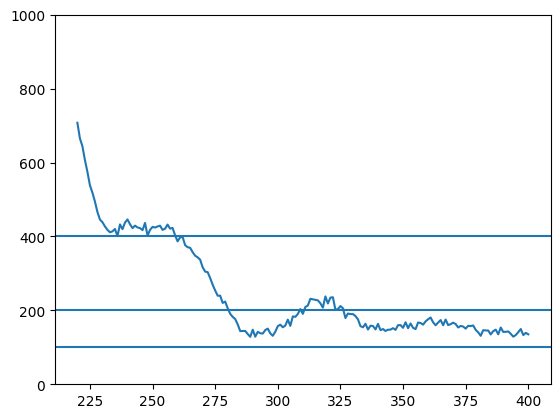

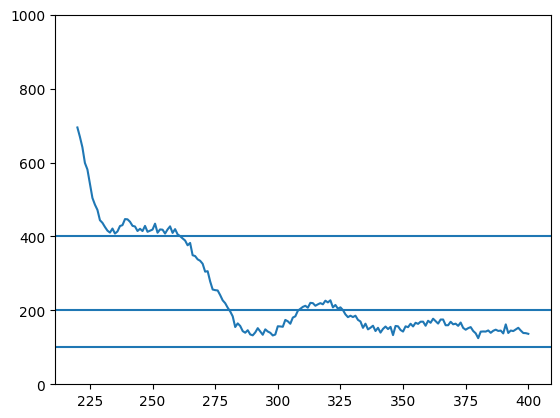

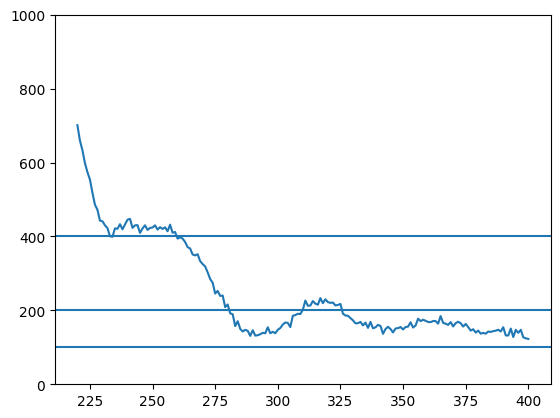

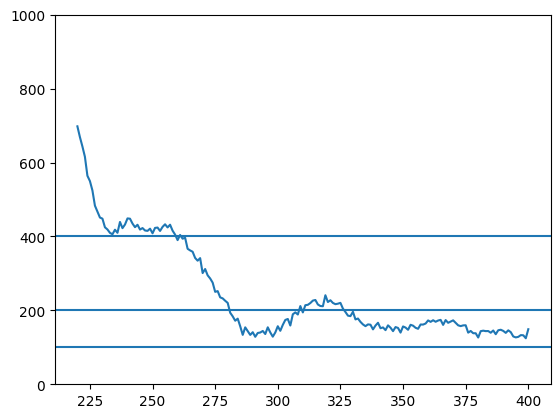

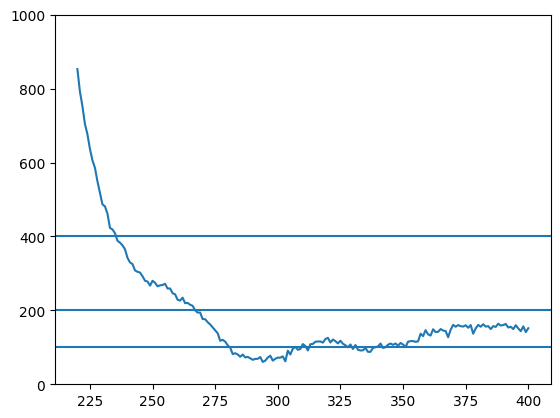

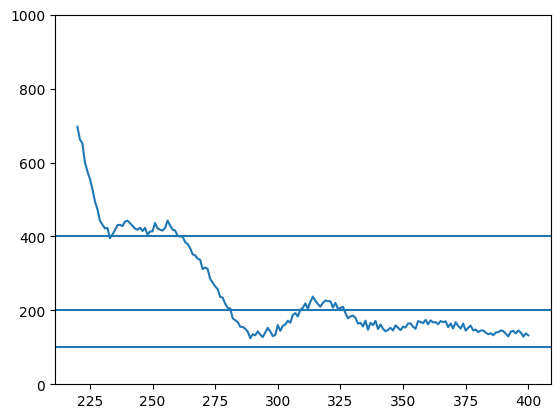

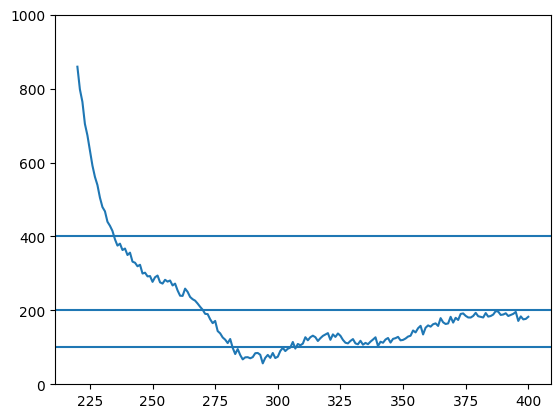

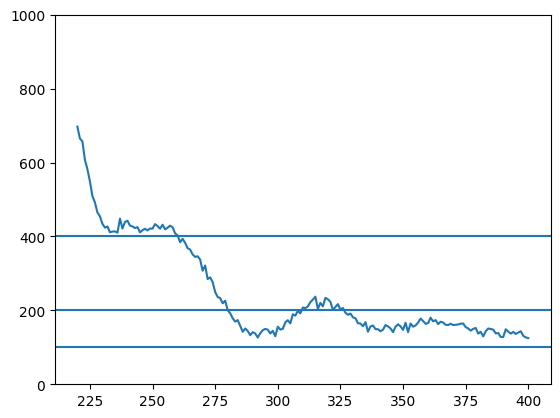

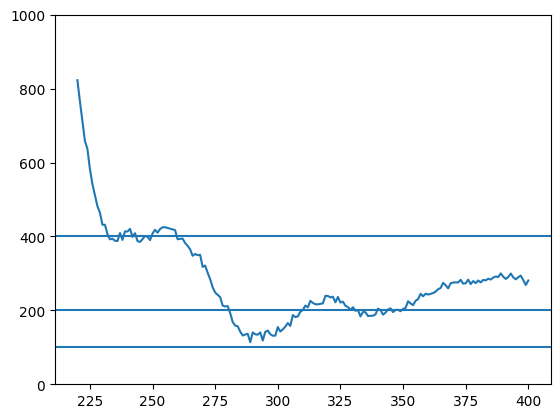

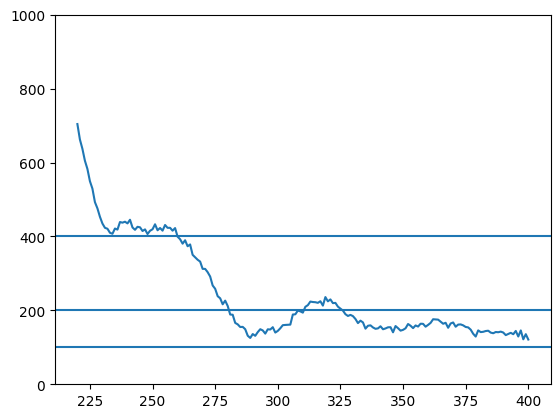

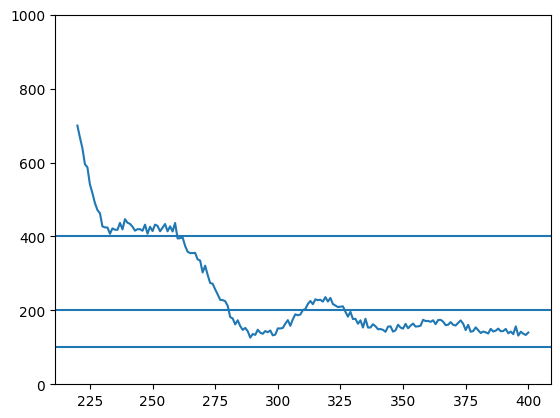

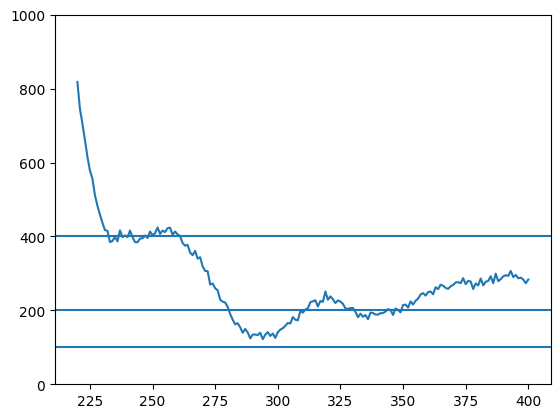

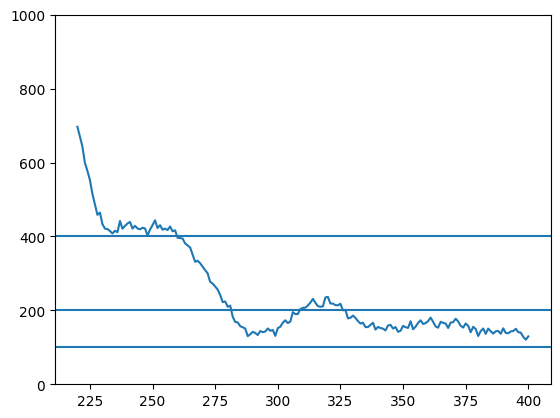

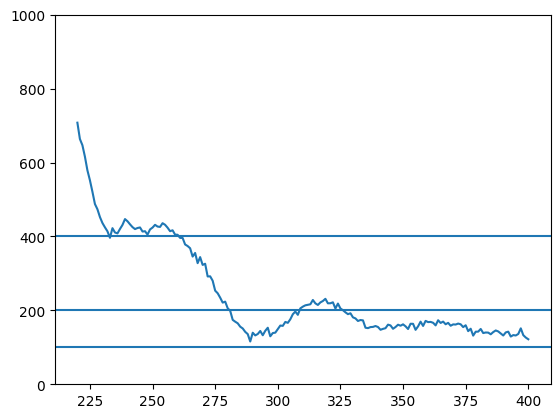

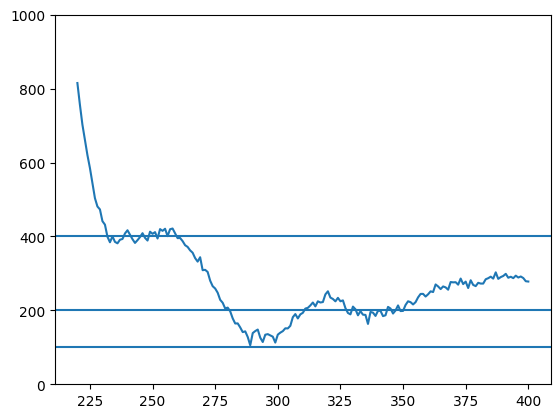

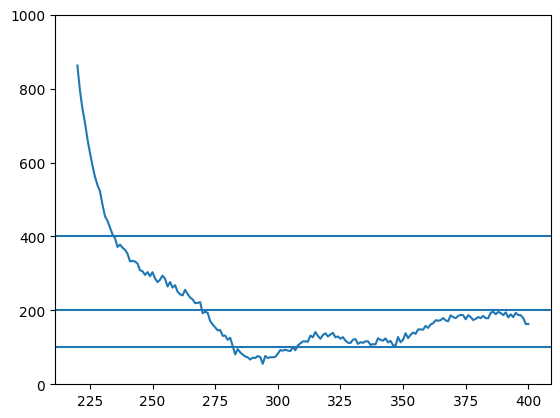

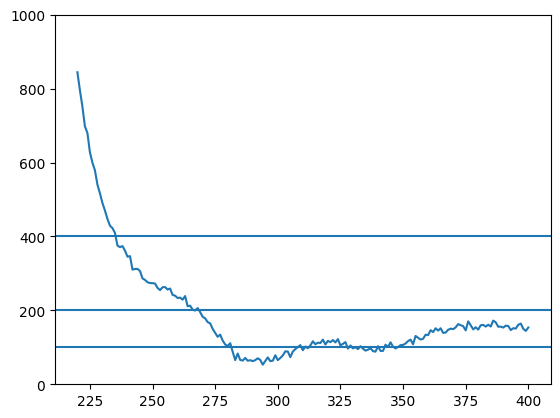

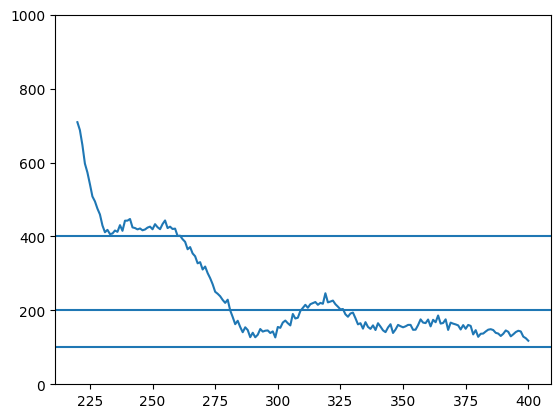

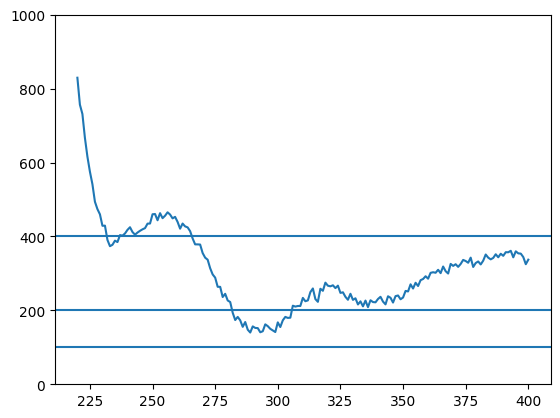

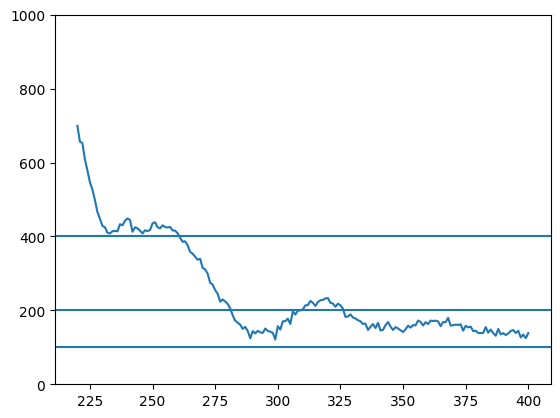

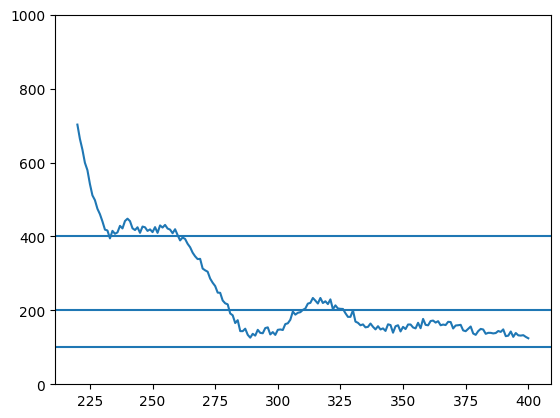

In [8]:
def getProduct(df, row_ind, verbose = False):
    nm = [int(i) for i in list(df.columns)[2:]]
    values = list(df.loc[row_ind][2:])
    product = ""

    ind260 = nm.index(260)
    ind340 = nm.index(340)
    ind380 = nm.index(380)

    
    if values[ind340] < 100:
        product = 'None'
    if values[ind260] > 400:
        product = 'hydro'
    if values [ind380] > 200:
        if not(product == 'hydro'):
            product = 'chloro'
        else:
            product = 'both'

    if verbose:
        if not(product == 'None'):
            plt.plot (nm, values)
            plt.axhline(100)
            plt.axhline(200)
            plt.axhline(400)
            plt.ylim(0,1000)
            plt.show()
            while not(input('press_y_to_continue') == 'y'):
                pass
        
    return product


all = spectra['Sequence'].values
#results = [getProduct(spectra, i, True) for i,_ in enumerate(all)]

In [3]:
all = spectra['Sequence'].values
none = [s for i,s in enumerate(all) if getProduct(spectra, i) == 'None']
any = [s for i,s in enumerate(all) if not(getProduct(spectra, i) == 'None')]
hydro = [s for i,s in enumerate(all) if getProduct(spectra, i) == 'hydro']
chloro = [s for i,s in enumerate(all) if getProduct(spectra, i) == 'chloro']
both = [s for i,s in enumerate(all) if getProduct(spectra, i) == 'both']

print(len(any))

3297


## Calculating and Plotting amino acid frequencies 

In [76]:
import numpy as np
import plotly.graph_objects as go
import nbformat

def compute_amino_acid_ratios(sequence_list):
    # Get the length of the sequences
    seq_length = len(sequence_list[0])

    # Initialize a dictionary to store the counts of each amino acid at each position
    counts = {aa: [0] * seq_length for aa in "ACDEFGHIKLMNPQRSTVWY"}

    # Iterate over the sequences and count the occurrences of each amino acid at each position
    for seq in sequence_list:
        for i, aa in enumerate(seq):
            counts[aa][i] += 1

    # Calculate the frequencies
    total_sequences = len(sequence_list)
    frequencies = {aa: [count / total_sequences for count in counts[aa]] for aa in "ACDEFGHIKLMNPQRSTVWY"}

    return frequencies

def subtract_dicts(dict1, dict2):
    """
    Subtract the values of two dictionaries with identical keys.

    Parameters:
    dict1 (dict): First dictionary.
    dict2 (dict): Second dictionary.

    Returns:
    dict: A new dictionary with the same keys as dict1 and dict2, with values subtracted.
    """
    result = {}
    for key in dict1:
        if key in dict2:
            result[key] = np.array(dict1[key]) - np.array(dict2[key])
        else:
            result[key] = np.array(dict1[key])
    # Include keys that are only in dict2 with their negative values
    for key in dict2:
        if key not in result:
            result[key] = -dict2[key]
    return result


def iplot(sequences, sequences2 = None):
    frequencies = compute_amino_acid_ratios(sequences)  

    if not(sequences2 == None):
        frequencies2 = compute_amino_acid_ratios(sequences2)
        frequencies  = subtract_dicts(frequencies, frequencies2)
    # Create an interactive scatter plot using plotly
    fig = go.Figure()

    for aa in "ACDEFGHIKLMNPQRSTVWY":
        fig.add_trace(go.Scatter(x=np.arange(len(frequencies[aa])), y=frequencies[aa], mode='markers', name=aa, text=[f'Amino Acid: {aa}<br>Position: {i}<br>Frequency: {freq:.2f}' for i, freq in enumerate(frequencies[aa])]))

    fig.update_layout(title='Amino Acid Frequencies',
                    xaxis_title='Position',
                    yaxis_title='Frequency')

    # Display the plot
    fig.show()


In [77]:
iplot(all)

- All proteins tested begin with methionine

In [78]:
iplot(none)

In [79]:
iplot(any)

At least 5 residues elevated in frequncy in product producing enzymes

In [80]:
iplot(hydro)

In [64]:
iplot(chloro)

In [81]:
iplot(both)

In [82]:
iplot(any, none)

In [86]:
iplot(hydro, none)

In [88]:
iplot(chloro, none)

In [91]:
iplot(chloro, hydro)

# Results
- Methionine starts each protein and will not be counted here

## Activity

### Necessary (Present in every protein with activity)
- H106 (100% present in all with product)
- H157 (100% present in all with product)

### Helpful (Elevated in every protein with activity)
- H134 (100$ Present in non-chlorinated product)

### Harmful (Decreased in proteins with activity)